# Introduction

In this class our primary aim is to learn how to explore alternative models. The standard models like the binomial distribution and the normal distribution only scratch the surface to what we can theorize about human behavior. Real working scientists always have far more nuanced and interesting model in their hands. It's just that sometimes they lack the mathematical skill to implement them. So we'll be working on over coming that problem.

Along the way we'll learn two really important general lessons:

1. In order to understand big complex models, we have to understand the parts. This might mean running small models that illustrate how one part works in isolation. It also means developing new kinds of visualizations so you can see what your parts are doing. In this case, the big model will give us a very surprising outcome. But we'll discover that it's not so surprising once we study the parts.

2. Significance testing requires you to specify which parameters to use on your model. When models get more complex, specifying only a single combination of parameters can feel arbitrary. There is rarely a unique combination of parameters that you can single out as "the" model. You'll just have to pick based on what you think is a plausible theory of behavior. When we turn to Bayesian inference, this same strategy for reasoning will help us design *prior* distributions.

# The Hot Hands Model

Recall the two big assumptions that went into the simulation. 

- On each cup, she has some level of accuracy.
- The accuracy stays constant throughout the course of the experiment.

We noted that the second assumption is questionable. We thought about a number of assumptions that could replace it. Here is one that I called the "hot hands" model. When Lady Bristol gets an answer right, her accuracy increase. When she gets an answer wrong, her accuracy decreases.

## Coding it

Let's translate that to code. The basic idea is that `a` will be updated throughout the loop depending on the outcome. We'll build it up in steps. Before we even touch our model, let's code up an even simpler example of a function that uses a loop where a variable is changing on each iteration of the loop. This is a good methodology whenever you start trying out a new idea but feel stuck. Don't try to get directly to you model you want. Hone in on your model by building a couple of simpler prototypes first. Here is the simplest possible case:

In [1]:
a = 0
for i in range(10):
    a = a + 1
    print(a)

1
2
3
4
5
6
7
8
9
10


Here is a case where we use if statements. In this code, a will grow 5 times and then decrease 5 times:

In [2]:
a = 0
for i in range(10):
    if i < 5:
        a = a + 1
    else:
        a = a - 1
        
    print(a)

1
2
3
4
5
4
3
2
1
0


Okay now we'll turn to the real model. In the first step, I'll update the docstring and use an if statement to increase her accuracy whenever she gets it right. Otherwise we'll decrease her accuracy.

In [1]:
import numpy as np

def simulate_hh_bristol(a,n,h):
    '''Returns a list of 0s and 1s of lengeth n
    with 0 indicating failure and 1 indicating success.
    The accuracy exhibits hot hands behavior - every time
    the player has a success, their accuracy increases
    and every time they have a failure, their accuracy decreases.
    
    a = accuracy on each cup
    n = the number of cups
    h = the increment by which accuracy increases or decreases.'''

    experiment = []

    for i in range(n):
        
        outcome = np.random.choice([1,0],p=[a,1-a])
        experiment.append(outcome)
        
        # if she's right, she gets better by amount h
        # otherwise, she gets worse by amount h
        
        if outcome == 1:
            a = a + h
        else:
            a = a - h
        
    return experiment

The downey reading introduced some of the structure of if statements. I'll break this down into parts to make sure it's super clear. The first half tells the model what to do whenever the outcome is equal to 1. In other words, whenever she gets it right. Take note of the double equals sign. That's how you check if two objects are equal. The single equals sign is reserved for assigning variables. Also notice the colon and the indent.

    if outcome == 1:
        a = a + h
                
The else condition triggers whenever the `if` condition doesn't. So if the outcome is 0 (or anything else), she loses accuracy.

    else:
        a = a - h

### Testing our new code
        
Everytime we start trying to build a new model, we'll run into errors. It happens to everyone. So let's plan for it by testing regularly.

In [4]:
simulate_hh_bristol(0.5,8,0.01)

NameError: name 'np' is not defined

Seems to work okay. But as always, testing a range of parameters is more revealing than testing a single configuration. Let's make `h` larger.

In [6]:
import numpy as np
np.random.seed(seed=1234567) 

# I've included the random seed function so you can
# reproduce this exact error on your own computer

simulate_hh_bristol(0.5,8,0.1)

ValueError: probabilities are not non-negative

If you run this enough times, you should get an error message that says `ValueError: probabilities are not non-negative`. Which is a confusing way of saying one of our probabilities that we handed to `random.choice()` has a negative number. But negative probabilities are impossible. The lowest probability for any event is just 0. So why is this coming up? Well, here's a good case for debugging with print.

In [7]:
def simulate_hh_bristol(a,n,h):
    '''Returns a list of 0s and 1s of lengeth n
    with 0 indicating failure and 1 indicating success.
    The accuracy exhibits hot hands behavior - every time
    the player has a success, their accuracy increases
    and every time they have a failure, their accuracy decreases.
    
    a = accuracy on each cup
    n = the number of cups
    h = the increment by which accuracy increases or decreases.'''

    experiment = []

    for i in range(n):
        
        print(a) # adding a print statement right before the error
        
        outcome = np.random.choice([1,0],p=[a,1-a])
        experiment.append(outcome)
        
        # if she's right, she gets better by amount h
        # otherwise, she gets worse by amount h
        
        if outcome == 1:
            a = a + h
        else:
            a = a - h
        
    return experiment

np.random.seed(seed=1234567)

simulate_hh_bristol(0.5,8,0.1)

0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999
1.0999999999999999


ValueError: probabilities are not non-negative

You can see that the accuracy level gets up to 1.09999 (or 1.1). Which also is not allowed. So our hot hands model need something to constrain the behavior of the accuracy so it stays within 1 and 0. There are a lot of potential solutions here - doing a little bit of research about sigmoid functions can give you inspiration for alternative models. But the simplest and least elegant solution is to just adds more conditions to the if / else structure.

In [7]:
def simulate_hh_bristol(a,n,h):
    '''Returns a list of 0s and 1s of lengeth n
    with 0 indicating failure and 1 indicating success.
    The accuracy exhibits hot hands behavior - every time
    the player has a success, their accuracy increases
    and every time they have a failure, their accuracy decreases.
    
    a = accuracy on each cup
    n = the number of cups
    h = the increment by which accuracy increases or decreases.'''

    experiment = []

    for i in range(n):
        
        outcome = np.random.choice([1,0],p=[a,1-a])
        experiment.append(outcome)
        
        # if she's right, she gets better by amount h
        # otherwise, she gets worse by amount h
        
        if outcome == 1:
            a = a + h
        else:
            a = a - h
            
        # check if she's better than 1 or worse than zero
        # and reset her
        
        if a > 1:
            a = 1
        if a < 0:
            a = 0
        
    return experiment

simulate_hh_bristol(0.5,8,0.1)

[1, 1, 1, 1, 1, 1, 1, 1]

It seems like things are in working order now so I also deleted the print statement. But do more testing. Check if this holds up for even bigger `h`'s or longer `n`'s before moving on.

In [10]:
# try it here and see if you can break your model

## Simulating batches of experiments

As before, we need to scale this up so we can run large batches of hypothetical experiments. A few adjustments to our `run_experiments()` code.

In [8]:
def run_hh_experiments(a,n,precision,h): # here we ad an extra parameter.
    '''Returns a list containing the number of cups lady bristol
    guessed correctly over many experiments
    
    a = accuracy on each cup
    n = number of cups per experiment
    precision = the number of experiments
    h = the increment by which accuracy increases or decreases. 
    '''
    
    all_trials = []

    for i in range(precision):

        correct = sum(simulate_hh_bristol(a,n,h)) # that extra parameter needs to get passed over to the main model
        all_trials.append(correct)

    return all_trials

# otherwise it all stays the same.

Okay now for the exciting part - we get to plot our distribution and see if this makes a big difference or not.

<BarContainer object of 9 artists>

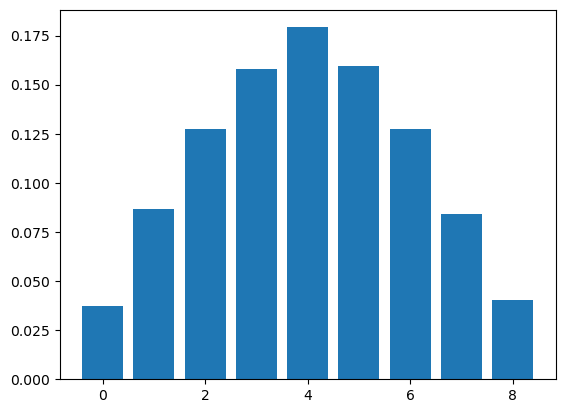

In [10]:
import matplotlib.pyplot as plt

a = 0.5
n = 8
k = 6
h = 0.05
precision = 10000

all_trials = run_hh_experiments(a,n,precision,h)
probs = []

for i in range(n+1):

    matches = all_trials.count(i)
    prob = matches / precision
    probs.append(prob)
    
plt.bar(range(n+1),probs)

# Assess the model

As with every model we build, we need to assess it to look out for three things:

- **the code is bad** - Does our code accurately capture the verbal model? 
- **the model is bad** - Do the assumptions make plausible predictions? 
- **our brains are bad** - Do we understand why the model makes these predictions? 

We've already learned a few techniques for assessing the model so let's use them.

## Make sure the model matches things you already know

Okay so what if `h` was zero? In this case, Lady Bristol's skill doesn't change from cup to cup. In this case, our new model should converge with our old model. Is that true? We'll use the same strategy from last lecture, overlaying a binomial distribution.

<BarContainer object of 9 artists>

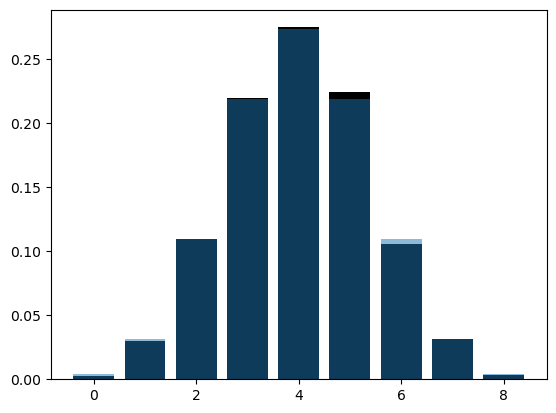

In [17]:
# test it our with our plotting trick

from scipy import stats

a = 0.5
n = 8
k = 6
h = 0
precision = 10000
outcomes = list(range(n+1))

probs_binom = stats.binom(n=n,p=a).pmf(outcomes)

all_trials = run_hh_experiments(a,n,precision, h)
probs_sim = []

for i in outcomes:

    matches = all_trials.count(i)
    prob = matches / precision
    probs_sim.append(prob)
    
plt.bar(outcomes,probs_sim,alpha=1,color="black")
plt.bar(outcomes,probs_binom,alpha=0.5,color="tab:blue")

<BarContainer object of 9 artists>

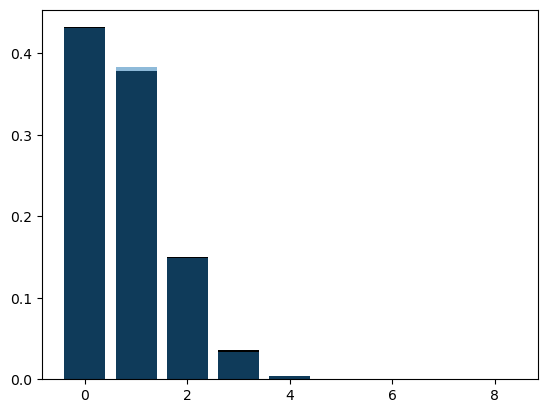

In [18]:
# test it our with our plotting trick

a = 0.1
n = 8
k = 6
h = 0
precision = 10000
outcomes = list(range(n+1))

probs_binom = stats.binom(n=n,p=a).pmf(outcomes)

all_trials = run_hh_experiments(a,n,precision, h)
probs_sim = []

for i in outcomes:

    matches = all_trials.count(i)
    prob = matches / precision
    probs_sim.append(prob)
    
plt.bar(outcomes,probs_sim,alpha=1,color="black")
plt.bar(outcomes,probs_binom,alpha=0.5,color="tab:blue")

Excellent - this is a sign that we didn't introduce any erroneous or un-expected behavior into our simulation. If your model is not doing this, revisit your code.

## Play with the parameters

This time we got 3 of them, `(a, n, h)` (precision won't count right now). This model can make very very strange shapes if you adjust the parameters the right way. There is really so much to explore here that I'm only going to pick one case study. 

Imagine lady Bristol starts off as pretty good `a = 0.7`. She's tasting 20 cups and her `h` increment is 0.05 (fairly small).

In [9]:
a = 0.7
n = 20
h = 0.05
precision = 10000

all_trials = run_hh_experiments(a,n,precision,h)
probs = []

for i in range(n+1):

    matches = all_trials.count(i)
    prob = matches / precision
    probs.append(prob)
    
plt.bar(range(n+1),probs)
plt.show()

NameError: name 'plt' is not defined

The resulting curve looks exponential as it bunches up against the ceiling of 20 cups. Then it has a long tail running across the rest of the distribution. This is a interesting contrast with the binomial. We saw last lecture that it stays fairly concentrated in a region around `a`. Compare the two distributions with the same `a` and `n` parameter:

<BarContainer object of 21 artists>

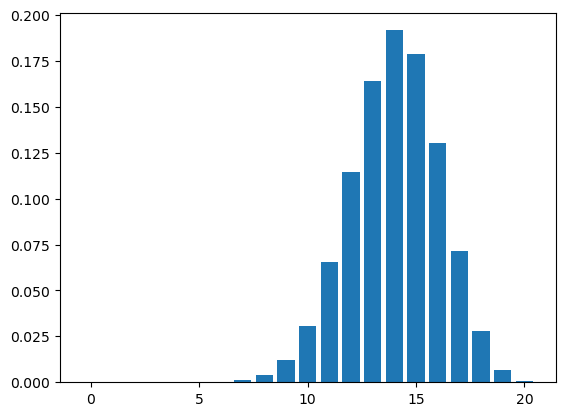

In [20]:
outcomes = list(range(n+1))

probs_binom = stats.binom(n=n,p=a).pmf(outcomes)
plt.bar(outcomes,probs_binom,color="tab:blue")

The binomial assigns essentially zero probability to everything below 7. The new model assigns some probability to every possible outcome, even zero cups. We can actually make the contrast more extreme by pushing up `h`. Also let's add our significance line to make a point.

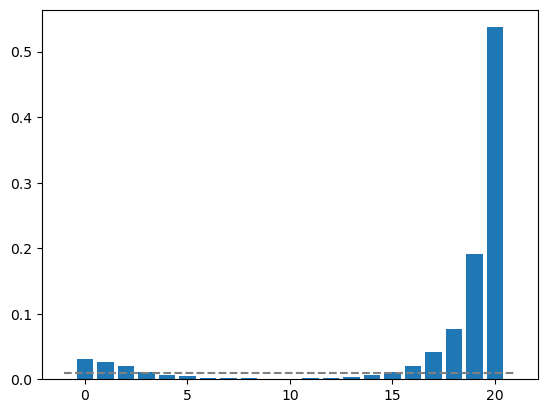

In [21]:
a = 0.7
n = 20
h = 0.12
precision = 10000

all_trials = run_hh_experiments(a,n,precision,h)
probs = []

for i in range(n+1):

    matches = all_trials.count(i)
    prob = matches / precision
    probs.append(prob)
    
plt.bar(range(n+1),probs)
plt.plot([-1,n+1],[0.01,0.01],'--',color="grey")

Now it looks only the extreme ends of the distribution are plausible. That's really surprising! We imagined she started out with about 70% accuracy. But it turns out she should get either > 15 correct or < 5 correct. If she gets 0 correct, that's fairly strong evidence against our model but not statistically significant at the 0.01 level. If she gets 10 correct, that's very strong evidence against our model!!

Is this a sign of a coding error, a bad assumption, or a lack of understanding? There is no algorithm to find out. But let's think about two scenarios. **One**. Imagine she starts off with 0.7 probability of success. Then she gets the first one wrong. Now she's down to 0.6. If she gets the one after that wrong, she's down to 0.5. It might cascade until her probability of success hits 0. **Two**. Imagine she gets the first one right. Now her probability of success is 0.8 so she's pretty likely to keep getting them right. That cascades until she hits accuracy = 1. What is not likely to happen is that her probability of success every stays fixed in the middle around 0.5. So she should rarely get 6-14 cups correct. That requires the cascade phenomena to not happen.

When we can build mechanistic explanations like this, that helps us undertand our code, model and theory more clearly. If we cannot provide an explanation, that points to problems at the model or code level.

## Develop new visualizations for new features

The last section suggested part of the key is to develop a good understanding of how the mechanism is behaving at each point in time. When you are clever and you really understand the model, you can work it out in words. But when you don't understand it yet or you want to explain it to other people, data visualization is the best tool. I want a diagram that gives we real-time information about how her probability of success is evolving over time. 

The first step will be rewritting our code to extract that kind of information.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_hh_bristol(a,n,h):
    '''Returns a list of 0s and 1s of lengeth n
    with 0 indicating failure and 1 indicating success. Also
    returns a list indicating the probability of success at each point
    in time.
    The accuracy exhibits hot hands behavior - every time
    the player has a success, their accuracy increases
    and every time they have a failure, their accuracy decreases.
    
    a = accuracy on each cup
    n = the number of cups
    h = the increment by which accuracy increases or decreases.'''

    experiment = []
    a_series = [] # build a list to store a

    for i in range(n):
        
        outcome = np.random.choice([1,0],p=[a,1-a])
        experiment.append(outcome)
        a_series.append(a) # we'll start appending a
        
        if outcome == 1:
            a = a + h
        else:
            a = a - h
        
        if a > 1:
            a = 1
        if a < 0:
            a = 0
        
    return experiment, a_series # return now gives us back two things

The big new coding trick is to return multiple things. We `return experiment, a_series`. Now when we want to use the code, we get a tuple with two lists in it.

In [23]:
simulate_hh_bristol(0.5,8,0.05)

([0, 0, 0, 1, 1, 1, 0, 1],
 [0.5, 0.45, 0.4, 0.35000000000000003, 0.4, 0.45, 0.5, 0.45])

This adds a new complication when we want to capture the output of the function. We need to assign two variables to be the output. Amazingly, we can just put two things on the left side of the assignment `=` function.

In [24]:
a,b = simulate_hh_bristol(0.5,8,0.05)

Okay now we get to visualize this new feature of the model.

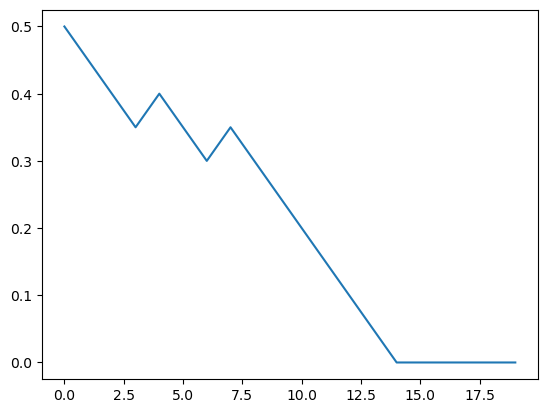

In [25]:
outcome, a_series = simulate_hh_bristol(0.5,20,0.05)
plt.plot(a_series)

Play with the parameters a bit here. When you are ready, check out this new, much cooler visualization. It overlays 50 simulations and makes them semi-transparent.

Text(0, 0.5, 'Accuracy')

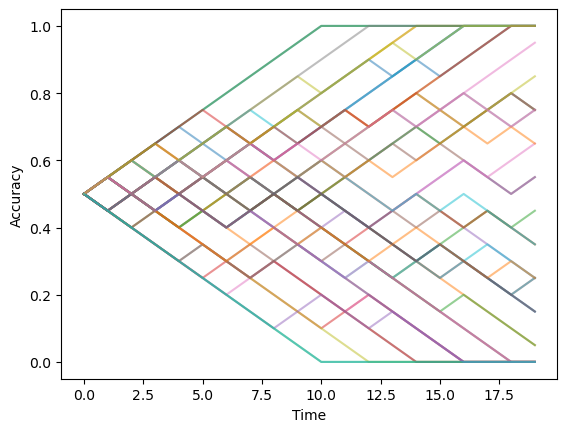

In [26]:
for i in range(50):

    outcome, a_series = simulate_hh_bristol(0.5,20,0.05)
    plt.plot(a_series,alpha=0.5)
    
plt.xlabel("Time")
plt.ylabel("Accuracy")

It makes a beautiful latrice of branching pathes. You can tell which regions have greater probability because they are more opaque then the rest. Places where only a few lines end up are places where Lady Bristol won't have that accuracy level very often. The same visual but with a higher `h`.

Text(0, 0.5, 'Accuracy')

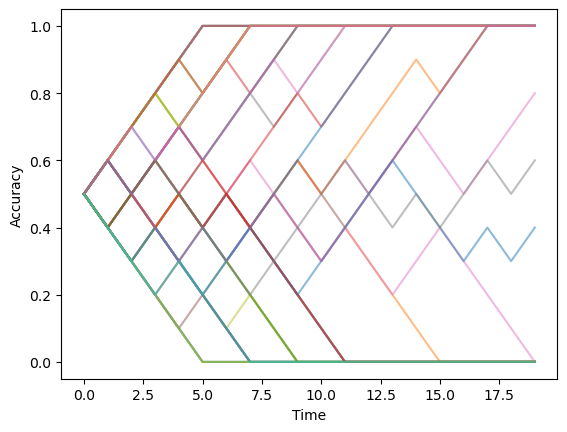

In [27]:
for i in range(50):

    outcome, a_series = simulate_hh_bristol(0.5,20,0.1)
    plt.plot(a_series,alpha=0.5)
    
plt.xlabel("Time")
plt.ylabel("Accuracy")

It also helps to explain why strange split distribution we got in the prior section. The reason why she rarely gets 9 or 10 or 11 cups correct is because her acccuracy almost never stays in the middle. It mostly pools on the edges. This is because the cascade phenomena I mentioned. If she gets it right on the first couple of cups, her probability is near 1.

# Significance testing with non-standard models

Most of the time when you read about a p-value or statistical significance in a science paper, they are saying they rejected an implicit *null* model based on some small likelihood of the data. In the Lady Tasting tea case, the standard null model is that she only has 0.5 probability of getting it right. This case is special because setting your parameter to 0.5 is kind like saying "she doesn't have a special power". It's a null model in the sense that it is asserting nothing interesting is going on.

But as you progress to more complex models, you will quickly see that no one set of parameters is a natural "null" model. For example, once we assume Bristol has hot hands, what is the "null" model there? Do we assume her hot hands factor is small or large? Do we assume she starts off with no ability and then goes from there? Or should we give her some ability? There are no general answers to these questions. It depends on what you are interested. Really, any configuration of parameters could be a "null" model and could be put to a hypothesis test. 

One good rule of scientific thinking is that some parameter values are more plausible than others: for instance, it would be really weird is Lady Bristol started off with less than a 0.5 probability of getting the cups correct. That's worse than randomly guessing. So that provides an intuitive constraint on our model. Similarly, it would be weird if the hot hands factor was very large: if Lady Bristol got 50% better whenever she gets one cup correct, that's like saying gaining just a little bit of confidence makes you perfect. That's not very plausible either. So aim to pick up parameter values that are consistent with simple facts you know. Then ask - if she gets 6 out of 8 correct, would your model survive this test?

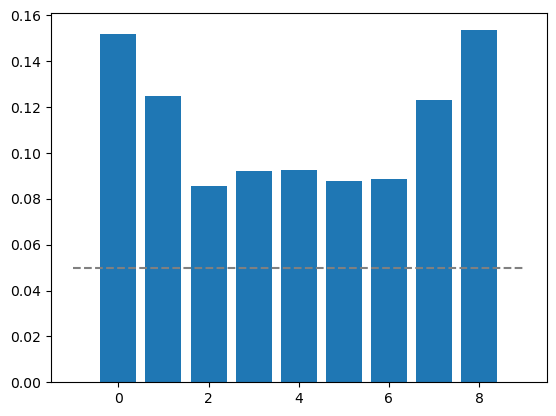

In [28]:
a = 0.5
n = 8
h = 0.1
precision = 10000

def run_hh_experiments(a,n,precision,h): # here we ad an extra parameter.
    '''Returns a list containing the number of cups lady bristol
    guessed correctly over many experiments
    
    a = accuracy on each cup
    n = number of cups per experiment
    precision = the number of experiments
    h = the increment by which accuracy increases or decreases. 
    '''
    
    all_trials = []

    for i in range(precision):

        correct,a_series = simulate_hh_bristol(a,n,h)
        correct = sum(correct)
        all_trials.append(correct)

    return all_trials


all_trials = run_hh_experiments(a,n,precision,h)
probs = []

for i in range(n+1):

    matches = all_trials.count(i)
    prob = matches / precision
    probs.append(prob)
    
plt.bar(range(n+1),probs)
plt.plot([-1,n+1],[0.05,0.05],'--',color="grey")

One striking result is that, at least for my parameters, it's impossible to reject the model no matter the outcome. Not every test can reveal the flaws in every claim. The hot hands model cannot easily be tested with small sample sizes and these parameter values.

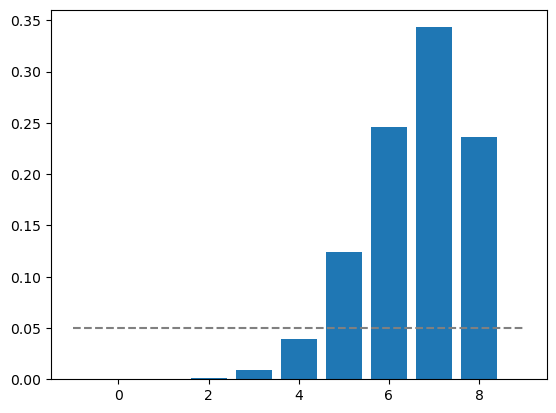

In [29]:
a = 0.8
n = 8
h = 0.01
precision = 10000


all_trials = run_hh_experiments(a,n,precision,h)
probs = []

for i in range(n+1):

    matches = all_trials.count(i)
    prob = matches / precision
    probs.append(prob)
    
plt.bar(range(n+1),probs)
plt.plot([-1,n+1],[0.05,0.05],'--',color="grey")

This parameter configuration, however, can. One important insight here - before you try to run an experiment, you should sit down and think: what kind of evidence could I find that would convince me I'm wrong? Drawing out probability distributions like this can save you time and resources because you can discover what kind of experiment is necessary to test certain kinds of claims before you ever run the experiment.